In [1]:
# vizualization
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import pickle


# Faster R-CNN-R50-FPN, COCO

In [2]:
# save log data to pickle
fpn_reg_loss = [
    0.3121,
    0.2797,
    0.2669,
    0.2583,
    0.2529,
    0.2488,
    0.2453,
    0.2424,
    0.2402,
    0.2384,
    0.2368,
    0.2353,
    0.2343,
    0.2330,
    0.2320,
    0.2311,
    0.2119,
    0.2069,
    0.2043,
    0.2021,
    0.2002,
    0.1983,
    0.1930,
    0.1924,
    0.1918,
    0.1914
]


fpn_cls_loss = [
    0.3532,
    0.2800,
    0.2626,
    0.2522,
    0.2457,
    0.2409,
    0.2365,
    0.2331,
    0.2303,
    0.2279,
    0.2257,
    0.2238,
    0.2225,
    0.2208,
    0.2194,
    0.2181,
    0.1784,
    0.1707,
    0.1669,
    0.1638,
    0.1613,
    0.1586,
    0.1514,
    0.1504,
    0.1498,
    0.1493,
]

fpn_reg_loss = np.array(fpn_reg_loss)
fpn_cls_loss = np.array(fpn_cls_loss)
# save to pickle
with open("fpn_reg_loss.pkl", "wb") as f:
    pickle.dump(fpn_reg_loss, f)
with open("fpn_cls_loss.pkl", "wb") as f:
    pickle.dump(fpn_cls_loss, f)

In [3]:
# save log data to pickle
ours_reg_loss = [
    0.3087,
    0.2770,
    0.2643,
    0.2569,
    0.2512,
    0.2475,
    0.2440,
    0.2414,
    0.2393,
    0.2378,
    0.2360,
    0.2348,
    0.2339,
    0.2324,
    0.2314,
    0.2305,
    0.2116,
    0.2068,
    0.2042,
    0.2021,
    0.2002,
    0.1985,
    0.1934,
    0.1926,
    0.1921,
    0.1919,
]

ours_cls_loss = [
    0.3470,
    0.2732,
    0.2551,
    0.2451,
    0.2374,
    0.2322,
    0.2280,
    0.2245,
    0.2215,
    0.2195,
    0.2169,
    0.2154,
    0.2138,
    0.2117,
    0.2109,
    0.2097,
    0.1718,   
    0.1645,
    0.1608,
    0.1580,
    0.1553,
    0.1533,
    0.1465,
    0.1455,
    0.1450,
    0.1447,
]

ours_reg_loss = np.array(ours_reg_loss)
ours_cls_loss = np.array(ours_cls_loss)
# save to pickle
with open("ours_reg_loss.pkl", "wb") as f:
    pickle.dump(ours_reg_loss, f)
with open("ours_cls_loss.pkl", "wb") as f:
    pickle.dump(ours_cls_loss, f)

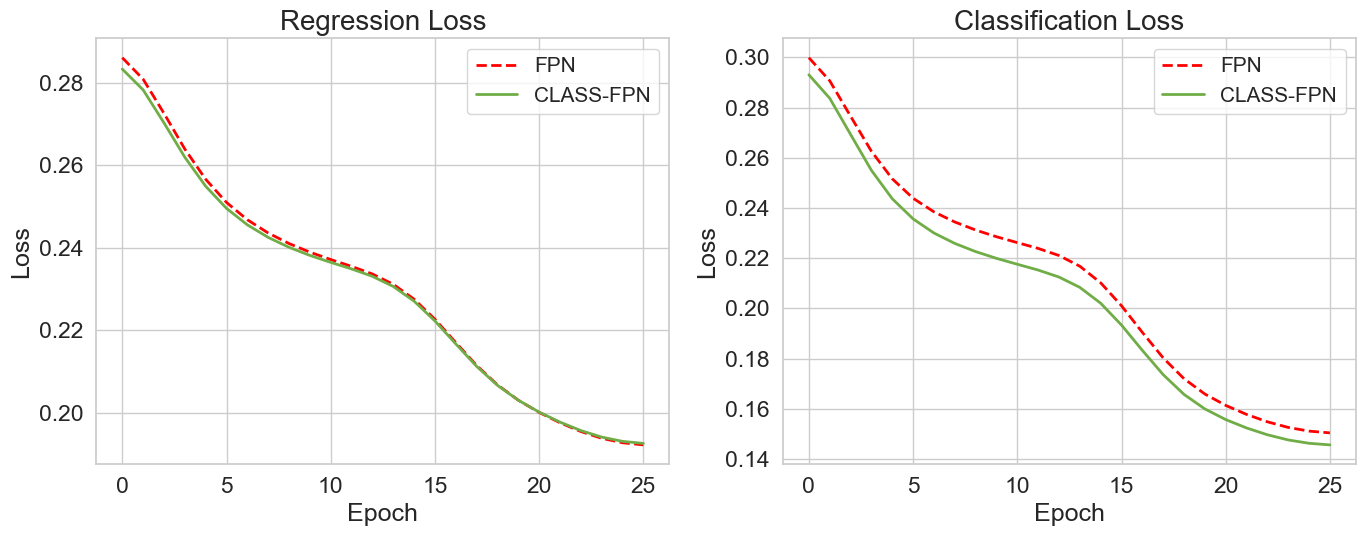

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import gaussian_filter1d

# Seaborn 스타일 설정
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.5)

# 데이터 로드
fpn_reg_loss = pickle.load(open("fpn_reg_loss.pkl", "rb"))
fpn_cls_loss = pickle.load(open("fpn_cls_loss.pkl", "rb"))
ours_reg_loss = pickle.load(open("ours_reg_loss.pkl", "rb"))
ours_cls_loss = pickle.load(open("ours_cls_loss.pkl", "rb"))

# 부드럽게 만들기 (Gaussian smoothing)
smooth_fpn_reg = gaussian_filter1d(fpn_reg_loss, sigma=2)
smooth_ours_reg = gaussian_filter1d(ours_reg_loss, sigma=2)
smooth_fpn_cls = gaussian_filter1d(fpn_cls_loss, sigma=2)
smooth_ours_cls = gaussian_filter1d(ours_cls_loss, sigma=2)

# Plot 설정
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# === Regression Loss Plot ===
x = np.arange(len(smooth_fpn_reg))
ax1.plot(smooth_fpn_reg,  label="FPN", color="red", linestyle="--", linewidth=2, alpha=1.0)
ax1.plot(smooth_ours_reg, label="CLASS-FPN", color="#70AD47", linestyle="-", linewidth=2)

ax1.set_title("Regression Loss", fontsize=20)
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend(loc="upper right", fontsize=15)

# === Classification Loss Plot ===
ax2.plot(smooth_fpn_cls,  label="FPN", color="red", linestyle="--", linewidth=2, alpha=1.0)
ax2.plot(smooth_ours_cls, label="CLASS-FPN", color="#70AD47", linestyle="-", linewidth=2)

ax2.set_title("Classification Loss", fontsize=20)
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.legend(loc="upper right", fontsize=15)

# 전체 제목 및 저장
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("ours_loss_comparison_emphasized.png", dpi=1200)
plt.show()

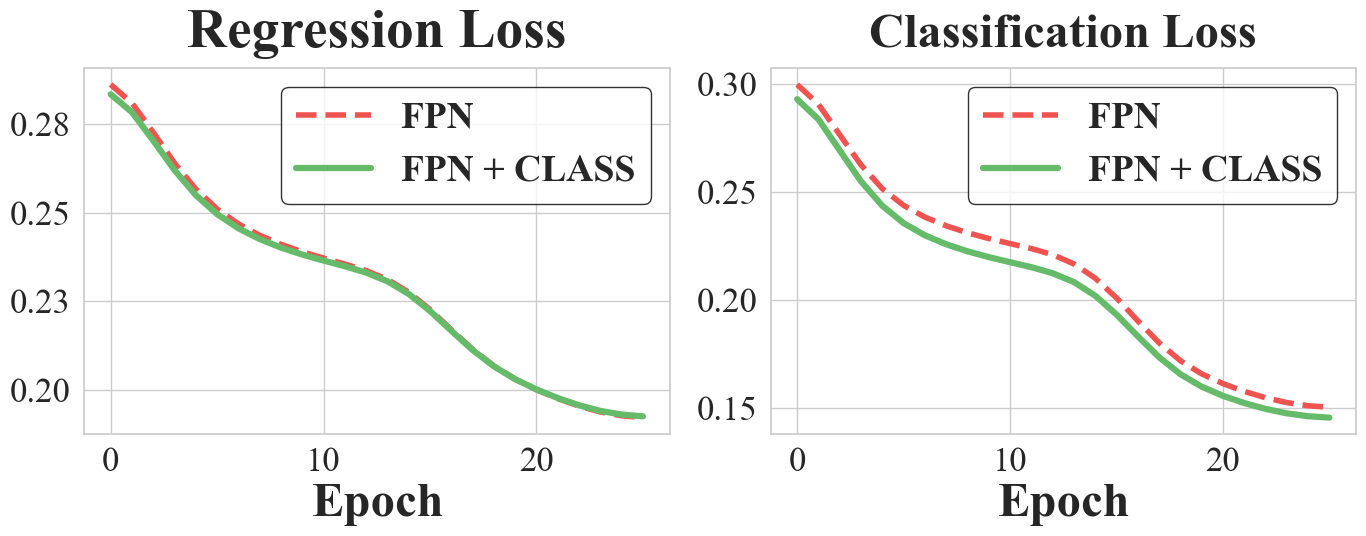

In [26]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import gaussian_filter1d
from matplotlib.ticker import FormatStrFormatter

from matplotlib import rcParams, font_manager
# 시스템에 설치된 Times New Roman 경로 검색
font_paths = [f.fname for f in font_manager.fontManager.ttflist if "Times New Roman" in f.name]
if font_paths:
    rcParams["font.family"] = "Times New Roman"
else:
    print("⚠️ 'Times New Roman' not found on your system. Default font will be used.")
plt.rcParams["font.family"] = "Times New Roman"


# 데이터 로드
fpn_reg_loss = pickle.load(open("fpn_reg_loss.pkl", "rb"))
fpn_cls_loss = pickle.load(open("fpn_cls_loss.pkl", "rb"))
ours_reg_loss = pickle.load(open("ours_reg_loss.pkl", "rb"))
ours_cls_loss = pickle.load(open("ours_cls_loss.pkl", "rb"))

# Gaussian smoothing
smooth_fpn_reg = gaussian_filter1d(fpn_reg_loss, sigma=2)
smooth_ours_reg = gaussian_filter1d(ours_reg_loss, sigma=2)
smooth_fpn_cls = gaussian_filter1d(fpn_cls_loss, sigma=2)
smooth_ours_cls = gaussian_filter1d(ours_cls_loss, sigma=2)

# Plot 설정
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 색상 고정
# fpn_color = "red"
# ours_color = "#70AD47"  # 기존 FPN + CLASS 색상

# ▶ 더 진한 색상으로 교체
fpn_color = "#EF5350"   # 연한 빨강 (Light Red)
ours_color = "#66BB6A"  # 연한 초록 (Light Green)

# 범례 정렬을 위한 공백
fpn_label = "FPN       "
class_label = "FPN + CLASS"

# === Regression Loss Plot ===
ax1.plot(smooth_fpn_reg, label=fpn_label, color=fpn_color, linestyle="--", linewidth=4, alpha=1.0)
ax1.plot(smooth_ours_reg, label=class_label, color=ours_color, linestyle="-", linewidth=4.5)

ax1.set_title("Regression Loss", fontsize=40, fontweight="bold", pad=15)
ax1.set_xlabel("Epoch", fontsize=35, fontweight="bold")
# ax1.set_ylabel("Loss", fontsize=35, fontweight="bold")
ax1.tick_params(axis="both", labelsize=25)
ax1.legend(
    loc="upper right",
    frameon=True,
    edgecolor='black',
    prop={"weight": "bold", "size": 27}
)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# === Classification Loss Plot ===
ax2.plot(smooth_fpn_cls, label=fpn_label, color=fpn_color, linestyle="--", linewidth=4, alpha=1.0)
ax2.plot(smooth_ours_cls, label=class_label, color=ours_color, linestyle="-", linewidth=4.5)

ax2.set_title("Classification Loss", fontsize=35, fontweight="bold", pad=15)
ax2.set_xlabel("Epoch", fontsize=35, fontweight="bold")
# ax2.set_ylabel("Loss", fontsize=40, fontweight="bold")
ax2.tick_params(axis="both", labelsize=25)
ax2.legend(
    loc="upper right",
    frameon=True,
    edgecolor='black',
    prop={"weight": "bold", "size": 27}
)


# 전체 여백 및 저장
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("fig4.pdf", bbox_inches="tight")
plt.show()

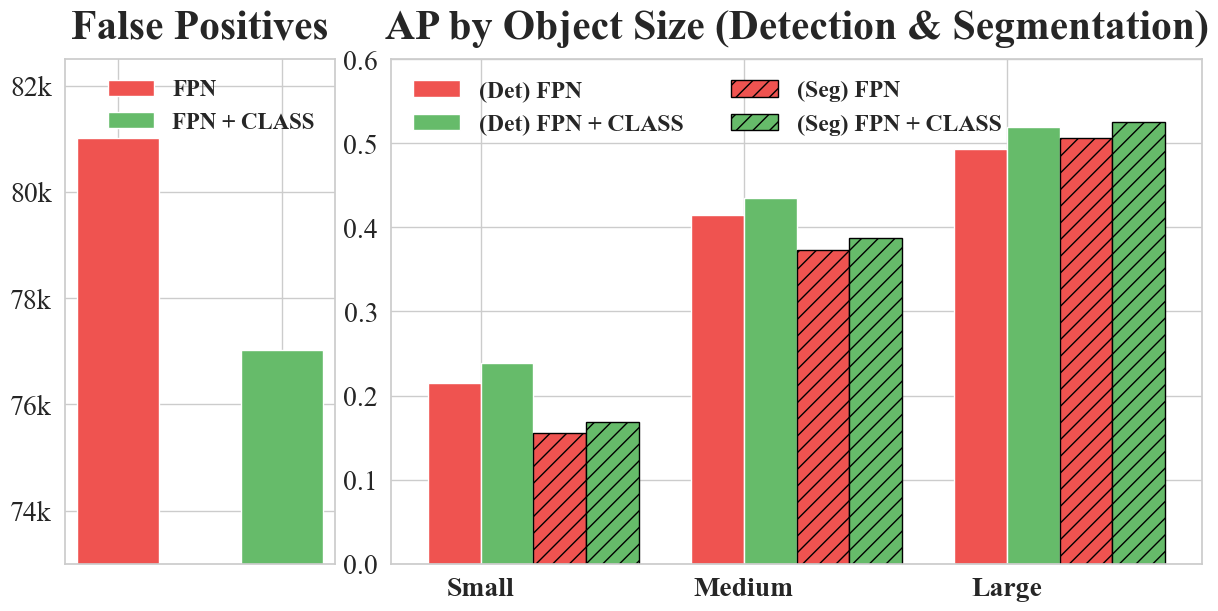

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# 색상 정의
fpn_color = "#EF5350"   # 연한 빨강 (Light Red)
ours_color = "#66BB6A"  # 연한 초록 (Light Green)

# 데이터 정의
baseline_fp = 81013
ours_fp = 77026

sizes = ['Small', 'Medium', 'Large']
baseline_bbox_ap = np.array([0.215, 0.414, 0.493])
ours_bbox_ap     = np.array([0.239, 0.435, 0.519])

baseline_segm_ap = np.array([0.156, 0.373, 0.506])
ours_segm_ap     = np.array([0.169, 0.387, 0.525])

# Figure 및 GridSpec 설정
fig = plt.figure(figsize=(12, 6), constrained_layout=True)
gs = fig.add_gridspec(1, 4)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])

# === (1) False Positive Bar Plot ===
bar_positions = [0, 0.5]
bar_width_fp = 0.25

ax1.bar(bar_positions[0], baseline_fp, color=fpn_color, width=bar_width_fp, label='FPN')
ax1.bar(bar_positions[1], ours_fp, color=ours_color, width=bar_width_fp, label='FPN + CLASS')

ax1.set_xticks(bar_positions)
ax1.set_xticklabels(['', ''], fontsize=1, fontweight="bold")
ax1.set_title("False Positives", fontsize=30, fontweight="bold", pad=15)
ax1.tick_params(axis='y', labelsize=20)
ax1.legend(fontsize=100, frameon=False, prop={"weight": "bold"})

ax1.set_ylim(73000, 82500)
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x/1000)}k"))

# === (2) Detection + Segmentation AP Bar Plot ===
x = np.arange(len(sizes))
total_width = 0.8
single_bar_width = total_width / 4

# Detection
ax2.bar(x - single_bar_width/2, baseline_bbox_ap, width=single_bar_width,
        label='(Det) FPN', color=fpn_color)
ax2.bar(x + single_bar_width/2, ours_bbox_ap, width=single_bar_width,
        label='(Det) FPN + CLASS', color=ours_color)

# Segmentation
ax2.bar(x + 1.5*single_bar_width, baseline_segm_ap, width=single_bar_width,
        label='(Seg) FPN', color=fpn_color, hatch='//', edgecolor='black')
ax2.bar(x + 2.5*single_bar_width, ours_segm_ap, width=single_bar_width,
        label='(Seg) FPN + CLASS', color=ours_color, hatch='//', edgecolor='black')

ax2.set_xticks(x)
ax2.set_xticklabels(sizes, fontsize=20, fontweight="bold")
ax2.set_title("AP by Object Size (Detection & Segmentation)", fontsize=30, fontweight="bold", pad=15)
ax2.tick_params(axis='y', labelsize=20)
ax2.set_ylim(0, 0.6)
ax2.legend(fontsize=20, frameon=False, ncol=2, prop={"weight": "bold", "size":17})


# 저장 및 출력
plt.savefig("fig5.pdf", bbox_inches="tight")
plt.show()